# Google playstore Data
### Complete Exploratory Data Analysis

# About Dataset
- `Description`


   The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline 

# 2. Data Loading and exploration and cleaning

↪ Load the csv file with the pandas

↪ creating the dataframe and understanding the data present in the dataset using pandas

↪ Dealing with the missing data, outliers and the incorrect records

In [7]:
df = pd.read_csv('./Data/googleplaystore.csv/googleplaystore.csv')

- Viewing the first five Rows of the data

In [8]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> Note: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:

In [9]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

In [10]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Datasetm

In [11]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Let's have a look on the shape of the dataset

In [12]:
df.shape

(10841, 13)

Not enough, let's have a look on the columns and their data types using detailed info function

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# *Observation*
---

1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
- 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
- 'Size', 'Installs', 'Price'

In [14]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# *Observations:*

- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that 'Size', 'Installs', 'Price' are also numeric, we must convert them to numeric data type in data wrangling process.

- Let's clean the Size column first

In [15]:
# check for null values
df['Size'].isnull().sum()

0

- No null values, we are good to go.

In [16]:
# check unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- There are several uniques values in the Size column, we have to first make the unit into one common unit from M and K to bytes, and then remove the M and K from the values and convert them into numeric data type.

In [17]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [18]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [19]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [20]:
# Total Values in Size column
df['Size'].value_counts().sum()

10841

In [21]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

- We have 8830 values in M units
- We have 316 values in k units
- We have 1695 value in Varies with device
> Let's convert the M and K units into bytes and then remove the M and K from the values and convert them into numeric data type.

In [22]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [23]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [24]:
df['Size_in_Mb'] = df['Size_in_bytes'].str.replace('[^\d.]', '', regex=True).astype(float)
df['Size_in_Mb'] = df['Size_in_Mb'].apply(lambda x: x / (1024 * 1024))

- Now we have converted every value into bytes and removed the M and K from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.
---

- Let's have a look on the Installs column

In [25]:
# check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [26]:
# let's have a values counts
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [27]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10839

In [28]:
# Total values in Installs column
df['Installs'].value_counts().sum()

10841

- The only problem I see here is the + sign in the values, let's remove them and convert the column into numeric data type.
- The total values in the Installs column are 10841 and there are no null values in the column.

- However, one value 0 has no plus sign

- Let's remove the plus sign + and , from the values and convert them into numeric data ty

In [29]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x[:-1]) if x.endswith('+') and x[:-1].isdigit() else 0 if x == 'Free' else int(x))

- Let's verify if the dtypes has been changes and the + and , sign has been removed

In [30]:
df.head() # check the head of the dataframe

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [31]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [32]:
df['Installs'].max() # this will show the value counts of the column

1000000000

In [33]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [34]:
df['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      16
Name: count, dtype: int64

- Let's have a look on the Price column

In [35]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [36]:
df['Price'].isnull().sum()

0

- No Null Values

In [37]:
df['Price'].value_counts() # check the value counts of the 'Price' column

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200

- We need to confirm if the values in the Price column are only with $ sign or not

In [38]:
# count the values having $ in the 'Price' column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [39]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10040

- Now we can confirm that the only currency used is $ in the Price column or 0 value, as 800+10041=10841 Total values
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [40]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x) if x != 'Everyone' else 0.0)

In [41]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [42]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


# 2.1. *Descriptive Statistics*

In [43]:
df.describe()

,Rating,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,10841.000000,1.000000
mean,4.193338,1.546291e+07,1.027273,0.000954
std,0.537431,8.502557e+07,15.948971,NaN
min,1.000000,0.000000e+00,0.000000,0.000954
25%,4.000000,1.000000e+03,0.000000,0.000954
50%,4.300000,1.000000e+05,0.000000,0.000954
75%,4.500000,5.000000e+06,0.000000,0.000954
max,19.000000,1.000000e+09,400.000000,0.000954


# *Observations:*
---

- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
- We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 78+ Millions, which is the range of reviews, and the mean is 444,111.93 which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

# But even before that we have to think about the missing values in the dataset.

# 2.2. *Dealing with the missing values*

Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

# Where to Learn more about Missing Values?

In the following blog [Missing Values k Rolay](https://codanics.com/missing-values-k-rolay/) you will understand how missing values can change your output if you ignore them and how to deal with them.

- Let's have a look on the missing values in the dataset

In [44]:
df.isnull().sum() # this will show the number of null values in each column

App                      0
Category                 0
Rating                1474
Reviews                  0
Size_in_bytes         1695
Installs                 0
Type                     1
Price                    0
Content Rating           1
Genres                   0
Last Updated             0
Current Ver              8
Android Ver              3
Size_in_Mb           10840
Installs_category        0
dtype: int64

In [45]:
df.isnull().sum() # this will show the number of null values in each column

App                      0
Category                 0
Rating                1474
Reviews                  0
Size_in_bytes         1695
Installs                 0
Type                     1
Price                    0
Content Rating           1
Genres                   0
Last Updated             0
Current Ver              8
Android Ver              3
Size_in_Mb           10840
Installs_category        0
dtype: int64

In [46]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

14022

In [47]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null

Size_in_Mb           99.990776
Size_in_bytes        15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Type                  0.009224
Content Rating        0.009224
App                   0.000000
Category              0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Genres                0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

- Let's plot the missing values in the dataset

<Axes: >

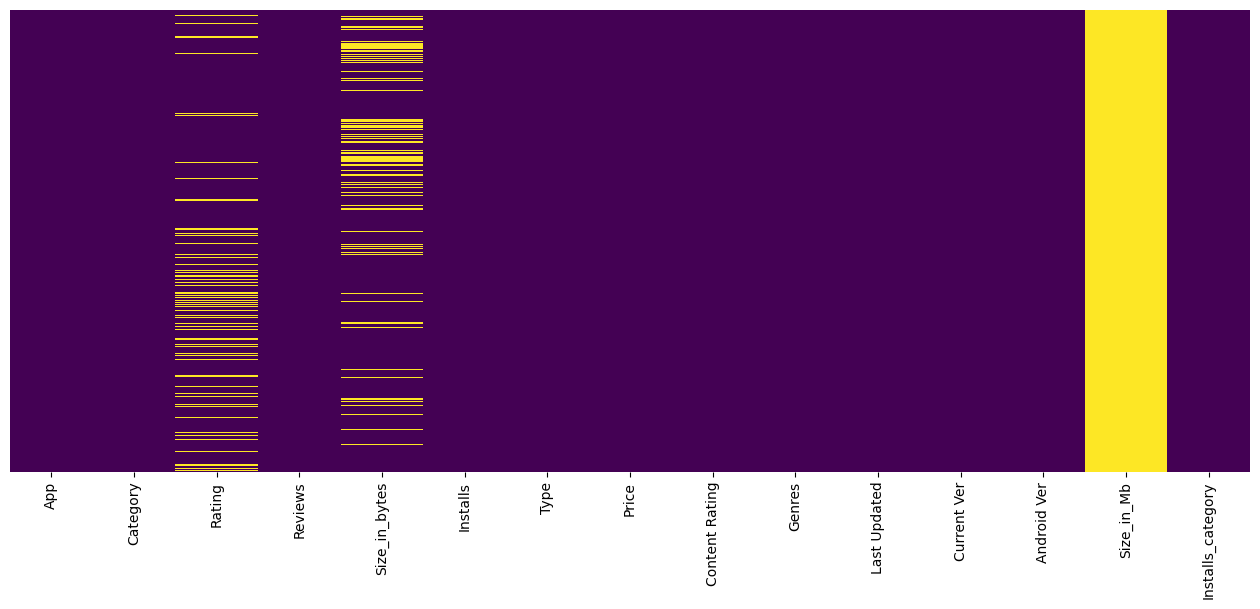

In [48]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of n

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

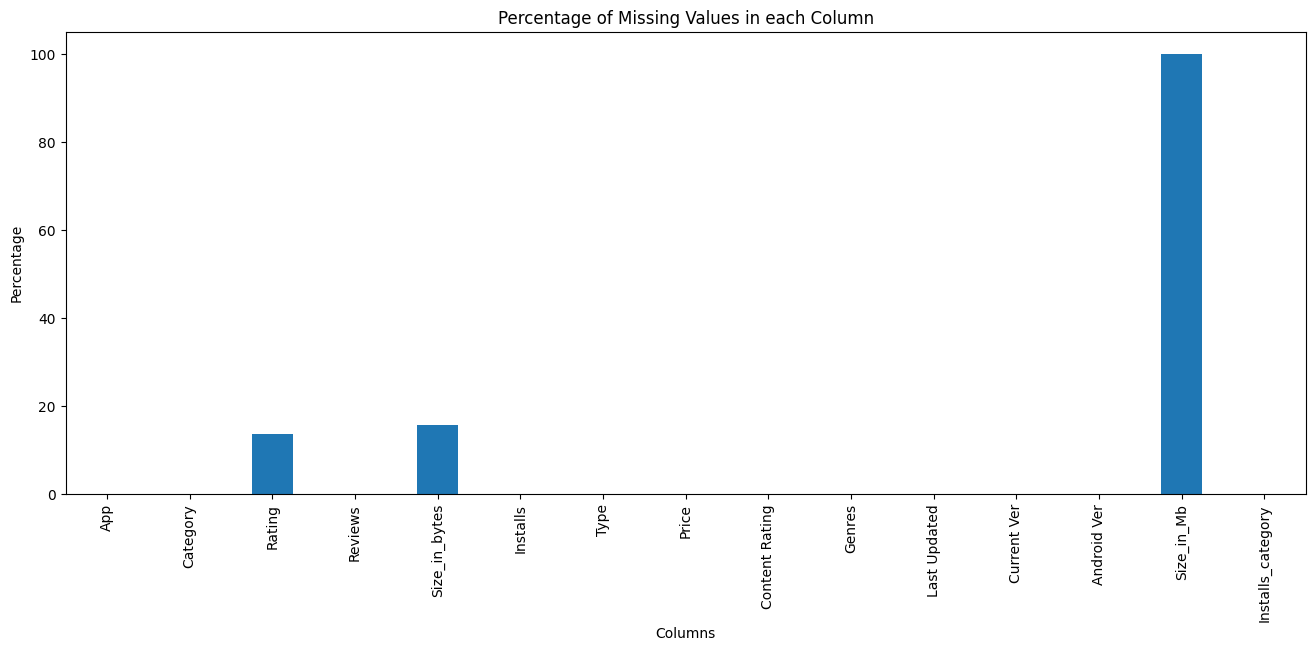

In [49]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:


Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

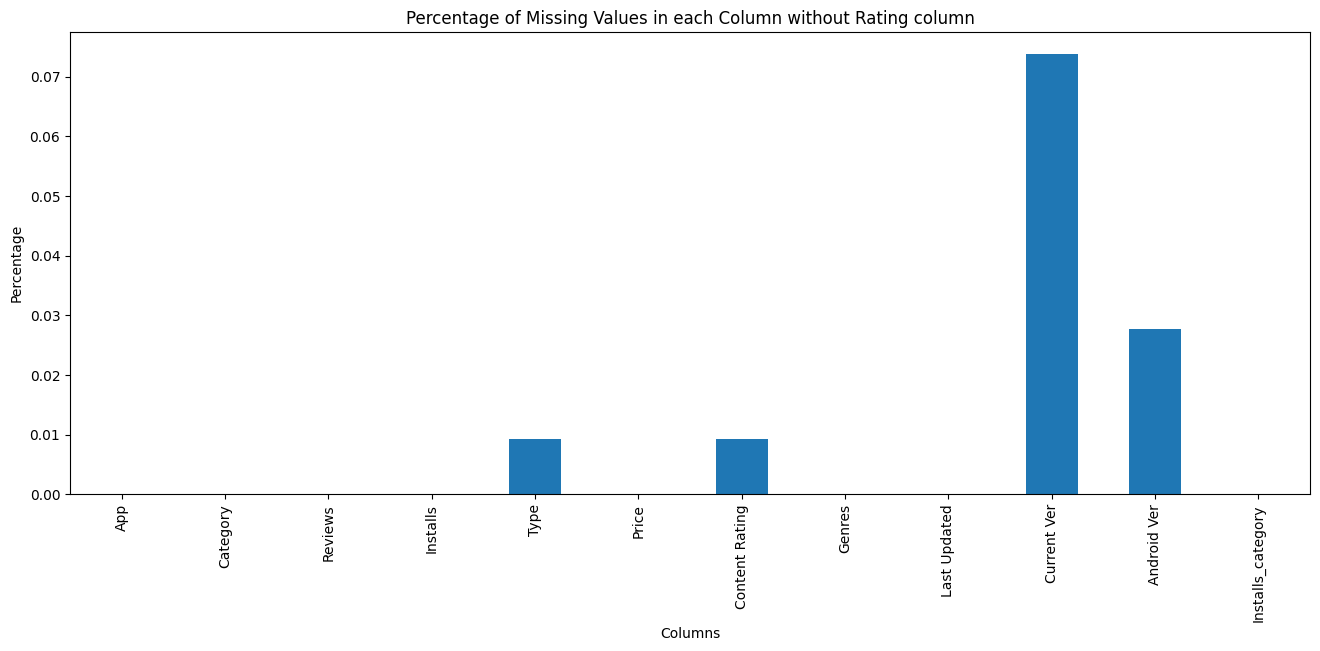

In [50]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the p

In [51]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column 

Size_in_Mb           10840
Size_in_bytes         1695
Rating                1474
Current Ver              8
Android Ver              3
Type                     1
Content Rating           1
App                      0
Category                 0
Reviews                  0
Installs                 0
Price                    0
Genres                   0
Last Updated             0
Installs_category        0
dtype: int64

In [52]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null

Size_in_Mb           99.990776
Size_in_bytes        15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Type                  0.009224
Content Rating        0.009224
App                   0.000000
Category              0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Genres                0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

# *Observations:*
---

- We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the 'Rating' column, which is 13.6% of the total values in the column.
- We have 8 missing value in the 'Current Ver' column, which is 0.07% of the total values in the column.
- We have 2 missing values in the 'Android Ver' column, which is 0.01% of the total values in the column.
- We have only 1 missing value in Category, Type and Genres columns, which is 0.009% of the total values in the column.

# 2.3. *Dealing with the missing values*

We can not impute the Rating column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.

---
- Let's run the correlations

In [53]:
df.describe() # these are numeric columns

,Rating,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,10841.000000,1.000000
mean,4.193338,1.546291e+07,1.027273,0.000954
std,0.537431,8.502557e+07,15.948971,NaN
min,1.000000,0.000000e+00,0.000000,0.000954
25%,4.000000,1.000000e+03,0.000000,0.000954
50%,4.300000,1.000000e+05,0.000000,0.000954
75%,4.500000,5.000000e+06,0.000000,0.000954
max,19.000000,1.000000e+09,400.000000,0.000954


<Axes: >

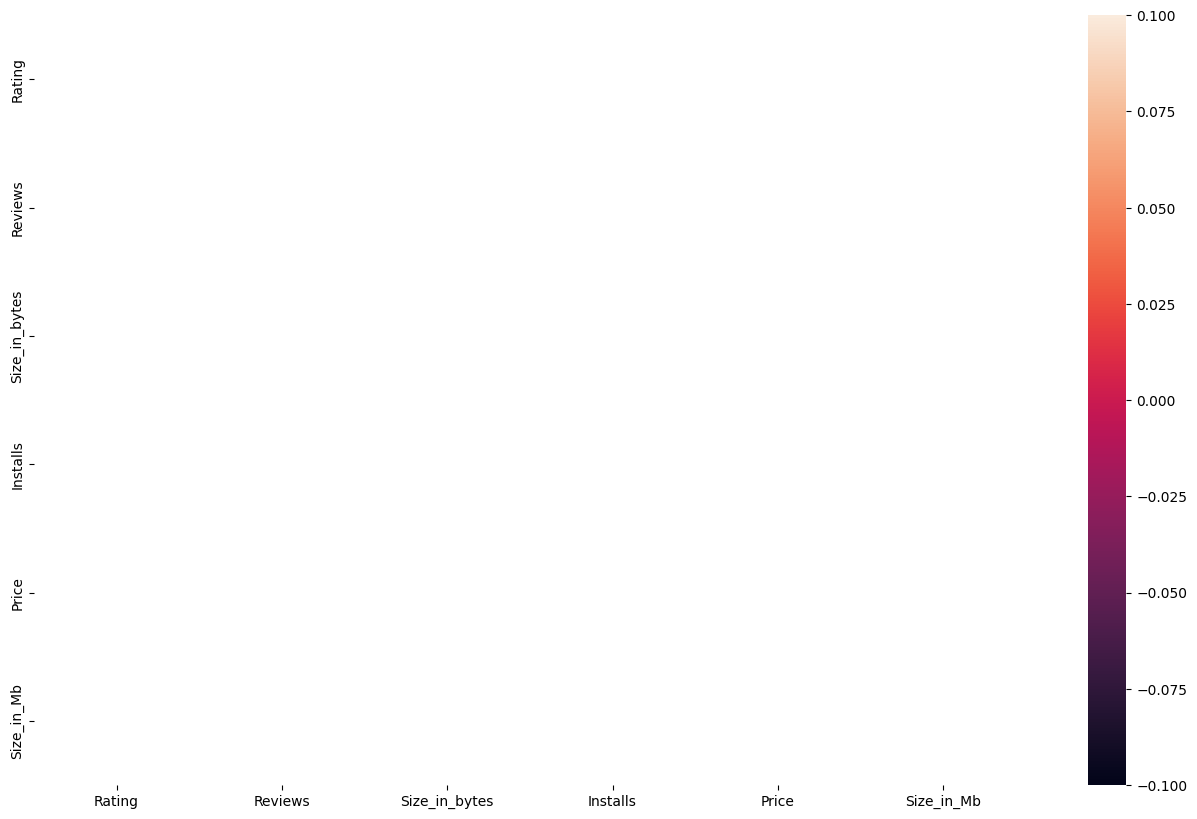

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))  # set the figure size

# Define a function to convert the size values to megabytes
def convert_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            size = size.replace('M', '')
            return float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            return float(size) / 1000
    return None

# Apply the conversion function to the 'Size_in_Mb' column
df['Size_in_Mb'] = df['Size_in_Mb'].map(convert_to_mb)

# Drop rows with NaN values in the 'Size_in_Mb' column
df = df.dropna(subset=['Size_in_Mb'])

numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb']  # list of numeric columns

sns.heatmap(df[numeric_cols].corr(), annot=True)  # plot the correlation matrix

In [55]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,NaN,NaN,NaN,NaN,NaN,NaN
Reviews,NaN,NaN,NaN,NaN,NaN,NaN
Size_in_bytes,NaN,NaN,NaN,NaN,NaN,NaN
Installs,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,NaN,NaN,NaN,NaN,NaN
Size_in_Mb,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
import scipy.stats as stats

# Remove rows containing NaN or infinite values
df_clean = df.dropna()

# Check if both 'Reviews' and 'Installs' columns have at least two valid data points
if len(df_clean['Reviews']) >= 2 and len(df_clean['Installs']) >= 2:
    # Calculate Pearson's R between 'Reviews' and 'Installs'
    pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
    print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")
else:
    print("Both 'Reviews' and 'Installs' columns must have at least two valid data points for correlation calculation.")

Both 'Reviews' and 'Installs' columns must have at least two valid data points for correlation calculation.


---
# *Observations*

- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the Reviews column has a high correlation with the Installs column, which is 0.64 according to corr(). Which is quite good.
- This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
- If we have an ap with 2 installs and we imputer the reviews with 1000 or via average reviews then it will be wrong.
- Installs is slightly correlated with Size_in_Mb or Size_in_bytes , which is 0.16, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.

---
- Before going ahead, let's remove the rows with missing values in the Current Ver, Android Ver, Category, Type and Genres columns, as they are very less in number and will not affect our analysis.

In [57]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 0


In [58]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [59]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 0


- We have removed 12 rows having null values in the Current Ver, Android Ver, Category, Type and Genres columns.

In [60]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

App                  0
Category             0
Rating               0
Reviews              0
Size_in_bytes        0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_in_Mb           0
Installs_category    0
dtype: int64

---
# *Observations*
- Only Rating and Size_in_bytes or Size_in_Mb columns are left with missing values.
- We know that we have to be carefull while deadling with Rating column, as it is directly linked with the Installs column.
- In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [61]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [62]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max


In [63]:
df['Rating'].isnull().sum()

0

In [64]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- Let's plot this and have a look

Text(7, 3.5, 'Null values: 0')

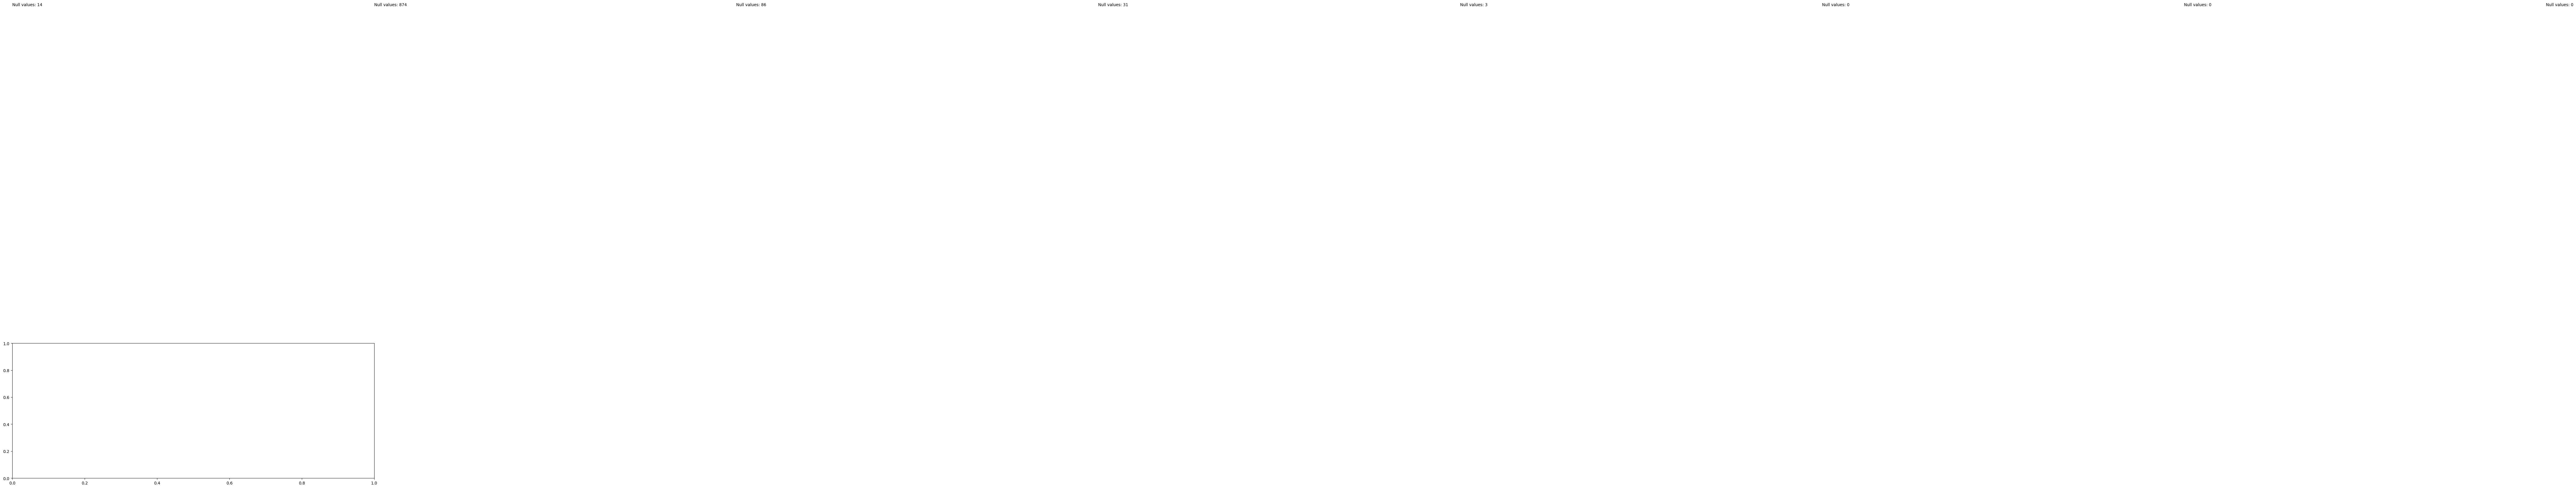

In [65]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Let's check if there is any similar link with Reviews as well

In [66]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no Null values in Reviews

<Axes: >

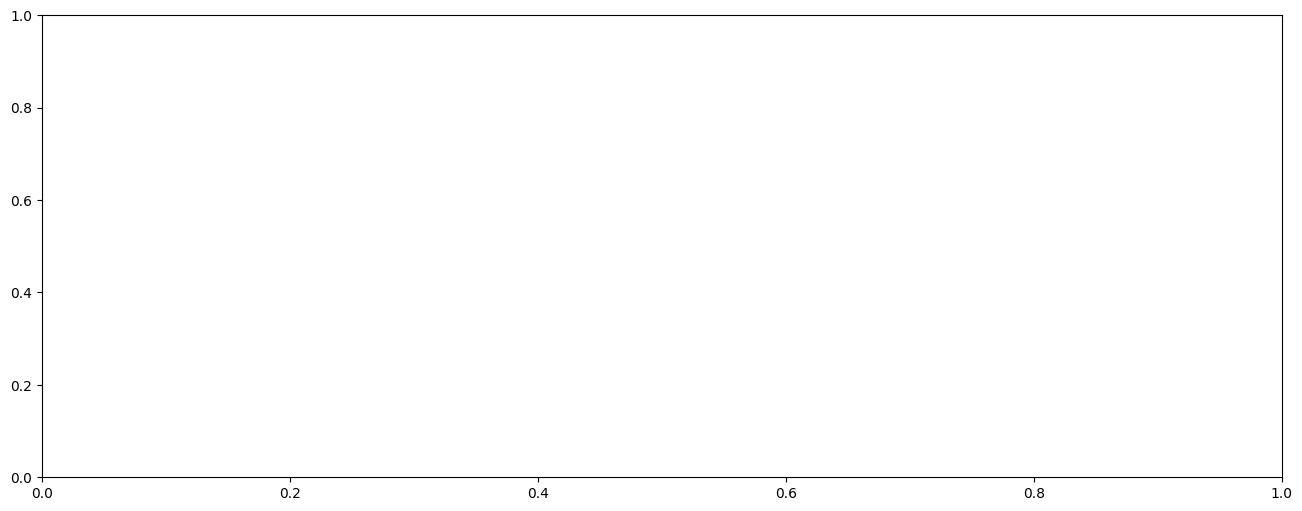

In [67]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: >

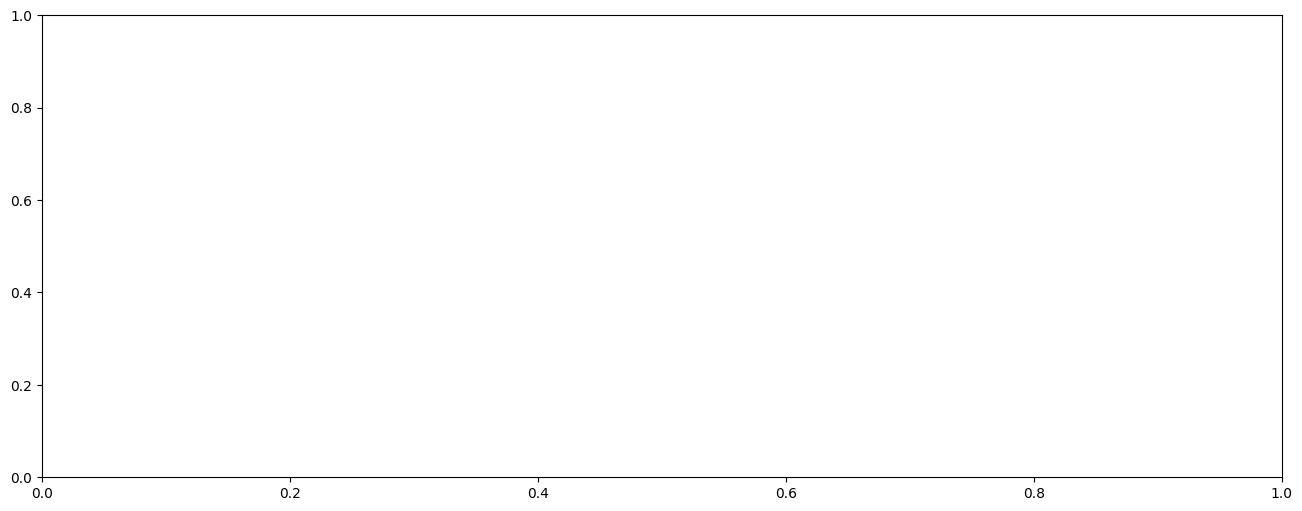

In [68]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

- We also draw the scatter plot of the Rating and Review columns with the Installs column

<Axes: >

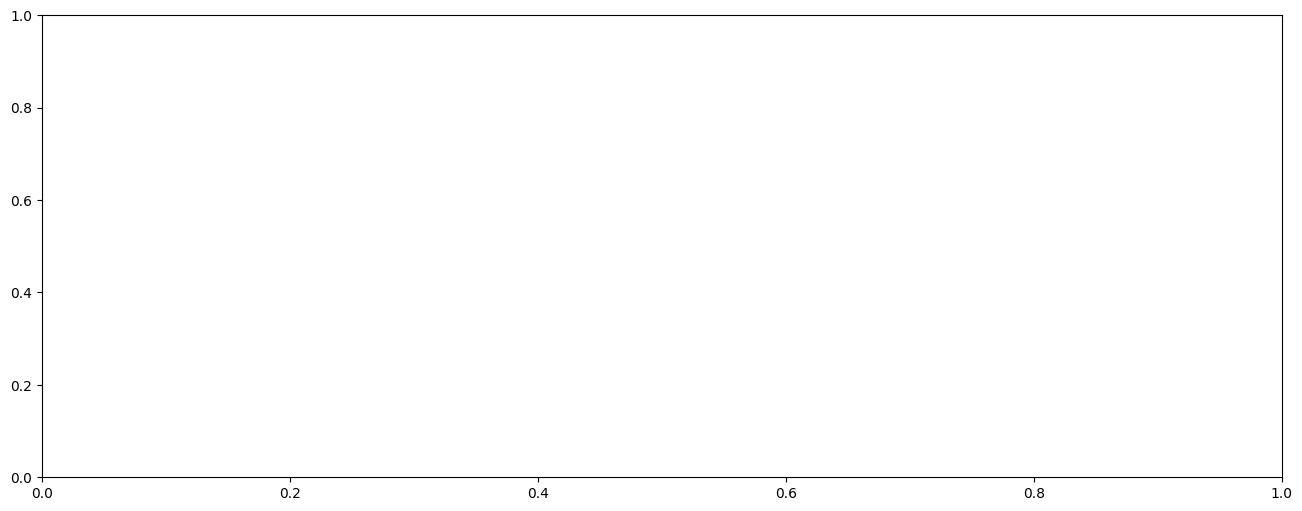

In [69]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot